In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from highlight_text import ax_text, fig_text
from pyfonts import load_google_font, load_font
from drawarrow import ax_arrow
from pypalettes import load_cmap
from pypalettes import add_cmap
import matplotlib.patches as patches
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [3]:
ucl_goal_time_path = r"D:\Learning\Data Visualization\data\sports\ucl_final\data\ucl\data\ucl_2024_25_goal_time_detail_top20.csv"

In [4]:
ucl_goal_time = pd.read_csv(ucl_goal_time_path)

In [5]:
ucl_goal_time = ucl_goal_time.set_index("team")

In [6]:
teams_reversed = ucl_goal_time.sort_values(by=["goal_for_total", "goal_against_total"], ascending=[True, False])

In [7]:
teams = teams_reversed.index.tolist()

In [8]:
time_slots = [
    '0-15', '16-30', '31-45',
    '46-60', '61-75', '76-90'
]

gd_slots = [
    '0-15_gd', '16-30_gd', '31-45_gd',
       '46-60_gd', '61-75_gd', '76-90_gd'
]

In [9]:
# Create the positions for the x and y axes
x_pos = np.arange(0.5, 6.5)  # x positions for the 6 time slots
y_pos = np.arange(0.5, 20.5)  # y positions for the 20 teams

In [10]:
vmin = min([teams_reversed[gd_slot].min() for gd_slot in gd_slots])
vmax = max([teams_reversed[gd_slot].max() for gd_slot in gd_slots])

In [11]:
# FONTS

font_DM_Serif_Text = load_google_font("DM Serif Text")
font_DM_Serif_Text_i = load_font(r"https://github.com/google/fonts/blob/main/ofl/dmseriftext/DMSerifText-Italic.ttf?raw=true")
font_Roboto_Flex = load_google_font("Roboto Flex")

In [12]:
semi_colors_texts = {
    'Inter Milan':[
        "<Inter> <Milan>",
        [
            dict(color="#003B5C", font=font_DM_Serif_Text, size=15),
            dict(color="#000000", font=font_DM_Serif_Text, size=15)
        ]
    ],
    'Paris SG':[
        "<Paris Saint>-<Germain>",
        [
            dict(color="#003B5C", font=font_DM_Serif_Text, size=15),
            dict(color="#C8102E", font=font_DM_Serif_Text, size=15)
        ]
    ],
    'Arsenal':[
        "<Arsenal>",
        [
            dict(color="#E30613", font=font_DM_Serif_Text, size=15)
        ]
    ],
    'FC Barcelona':[
        "<FC> <Barcelona>",
        [
            dict(color="#004B87", font=font_DM_Serif_Text, size=15),
            dict(color="#9E1B32", font=font_DM_Serif_Text, size=15)
        ]
    ]
}

semi_teams = [
    'Inter Milan', 'Paris SG',
    'Arsenal', 'FC Barcelona'
]

In [13]:
x_ticks = [0, 1, 2, 3, 4, 5, 6]
x_tick_labels = [
    "0'", "15'", "30'",
    "45'", "60'", "75'", "90'"
]

In [17]:
cmap = load_cmap("BuRd", reverse=True)
cmap_norm = plt.Normalize(vmin=vmin, vmax=vmax)
bg = "#FDFAF6"

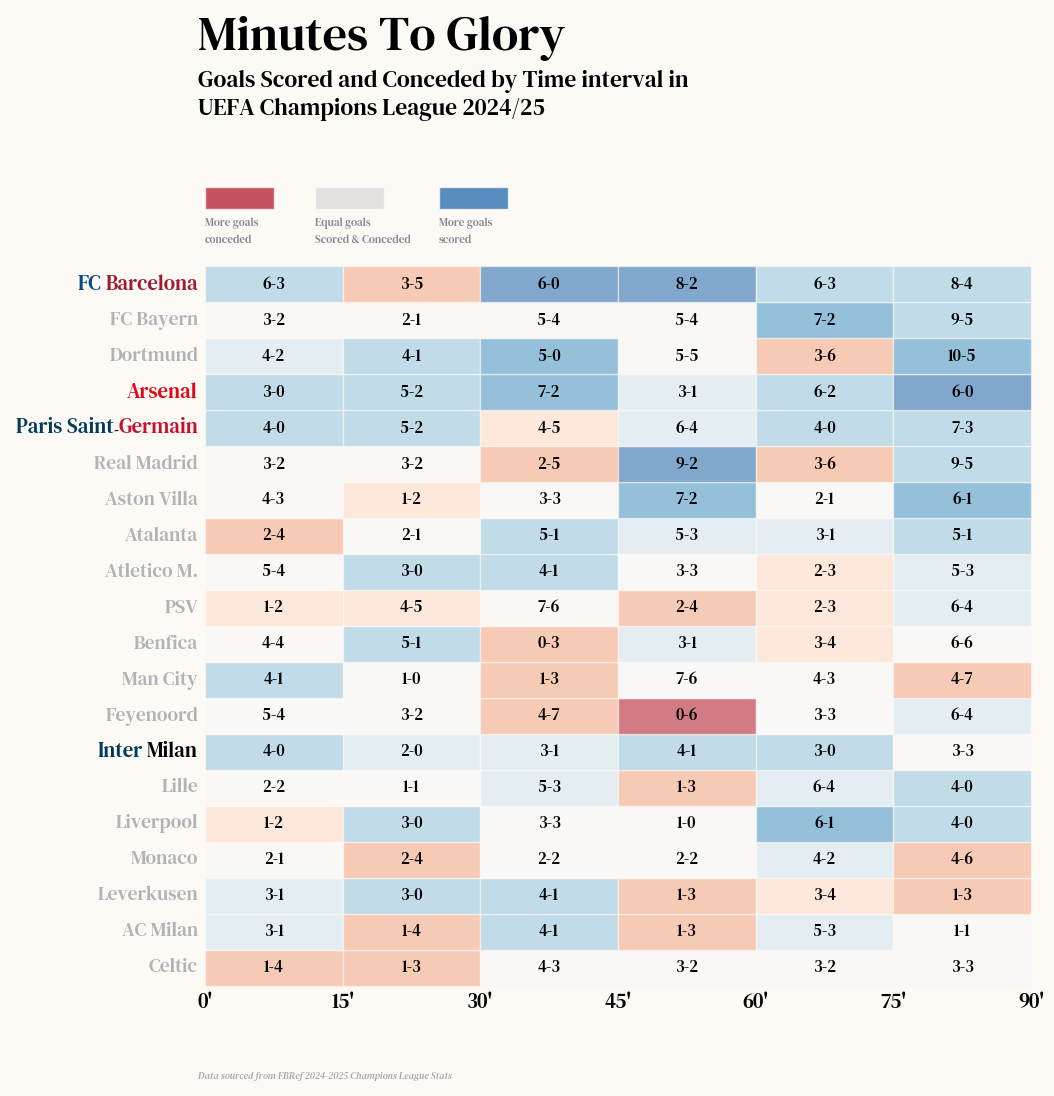

In [18]:
fig, ax = plt.subplots(figsize=(12, 12))

fig.subplots_adjust(top=0.75, bottom=0.08, left=0.2)

fig.set_facecolor(bg)
ax.set_facecolor(bg)

fig_text(x=0.2, y=0.89, s="Minutes To Glory", font=font_DM_Serif_Text, size=35)
fig_text(x=0.2, y=0.845, s="Goals Scored and Conceded by Time interval in\nUEFA Champions League 2024/25",
         font=font_DM_Serif_Text, size=17)


ax.tick_params(axis="both", which="both", length=0)
ax.spines[["top", "right", "left", "bottom"]].set_visible(0)

box_w = 1
box_h = 1

for i, team in enumerate(teams):
    for j, time in enumerate(time_slots):
        # Calculate x and y positions based on the index
        x = x_pos[j]  # x position is based on time slots
        y = y_pos[i]  # y position is based on team index

        gd = teams_reversed.loc[team, gd_slots[j]]
        color = cmap(cmap_norm(gd))

        # Create a box 
        box = patches.Rectangle(
            (x - box_w / 2, y - box_h / 2), width=box_w, height=box_h,
            edgecolor=bg, facecolor=color, linewidth=1, alpha=0.56
        )
        ax.add_patch(box)

        score_text = teams_reversed.loc[team, time]
        ax_text(
            x, y, s=score_text,
            ha="center", va="center", size=12,
            font=font_DM_Serif_Text
        )

# Set axis limits
ax.set_xlim(-0.05, 6.05)
ax.set_ylim(-0.05, 22.3)

# Set the tick labels for x and y
ax.set_xticks(x_ticks)  # Time slots on the x-axis
ax.set_yticks(y_pos)  # Teams on the y-axis
ax.set_xticklabels(x_tick_labels, fontdict=dict(font=font_DM_Serif_Text, size=15))  # Time slots labels
ax.set_yticklabels([])

for y, team in zip(y_pos, teams):
    if team in semi_teams:
        ax_text(x=-0.05, y=y, s=semi_colors_texts.get(team)[0],
                ha="right", va="center",
                highlight_textprops=semi_colors_texts.get(team)[1])
    else:
        ax_text(x=-0.05, y=y, s=str(team),
                ha="right", va="center",
                font=font_DM_Serif_Text,
                color="#686D76", size=14, alpha=0.5)

plt.setp(ax.get_xticklabels(), ha="center")

legend_xy = [(0, 21.6), (0.8, 21.6), (1.7, 21.6)]
legend_colors = ['#B2182BFF', '#DBDBDB', '#2166ACFF']
legend_text = ["More goals\nconceded", "Equal goals\nScored & Conceded", "More goals\nscored"]
for xy, color, text in zip(legend_xy, legend_colors, legend_text):
    legend = patches.Rectangle(
        xy, width=0.5, height=0.6,
        edgecolor=bg, facecolor=color,
        linewidth=1, alpha=0.75
    )
    ax.add_patch(legend)
    ax_text(
        x=xy[0], y=(xy[1])-0.25, s=text,
        size=8, color="#686D76", font=font_DM_Serif_Text,
        ha="left", alpha=0.8
    )

# data credits
fig_text(
    x=0.2, y=0.01, s="Data sourced from FBRef 2024-2025 Champions League Stats",
    font=font_DM_Serif_Text_i, size=7, color="#686D76", alpha=0.6
)

plt.savefig(r"D:\Learning\Data Visualization\data\sports\ucl_final\data\ucl\visual\ucl.jpeg", dpi=250, bbox_inches="tight", pad_inches=0.5)

---